In [1]:
#NOTE: ONLY WORKS WITH COMPANIES THAT ARE REPORTING A POSITIVE EPS
#ADEMOLA ADAM ASIMOLOWO
 
import pandas as pd
import matplotlib.pyplot as plotter
print(pd)
print(plotter)

    
intrinsicvaluedf = pd.read_csv("intristicvaluesheet.csv")
intrinsicvaluedf['Intrinsic Value'] = None




<module 'pandas' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>
<module 'matplotlib.pyplot' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [2]:




#Method #1

def get_intrinsicvalue(ticker):
    

    for i in intrinsicvaluedf.index:
        if intrinsicvaluedf.iloc[:, 0][i] == ticker:
            
            intrinsic_value = (intrinsicvaluedf.iloc[:,1][i]*(intrinsicvaluedf.iloc[:,2][i] + (intrinsicvaluedf.iloc[:,4][i] * intrinsicvaluedf.iloc[:,3][i])) * intrinsicvaluedf.iloc[:,5][i])/(intrinsicvaluedf.iloc[:,6][i])
            intrinsicvaluedf.iloc[:,9][i] = intrinsic_value
        
            #marginp = intrinsic price x margin safety % 
            num = intrinsicvaluedf.iloc[:, 9][i] * intrinsicvaluedf.iloc[:, 7][i]
            margin_safety_price = intrinsicvaluedf.iloc[:, 9][i] - num             
           
            
            #upside/downside potential intrisicvalue/current price
            upside_downside = ((intrinsic_value/intrinsicvaluedf.iloc[:, 8][i])-1) * 100
            print(upside_downside)
            
            print("------------" + ticker + " ANALYSIS---------------\n")
            
            
            print("Intrinsic Value of " + ticker + " is {val:1.2f}".format(val = intrinsic_value))
            print("Current Price of " + ticker + " is {}".format( intrinsicvaluedf.iloc[:,8][i]))
           
            
            if intrinsicvaluedf.iloc[:,9][i] > intrinsicvaluedf.iloc[:, 8][i]:
                print("Therefore, " + ticker + " is undervalued")
                print("\nBUY / SELL\nBUY")
                if intrinsicvaluedf.iloc[:,8][i] < margin_safety_price:
                    print("TIME TO LOAD UP")
                
            else:
                print("Therefore, " + ticker + " is overvalued")
                print("\nBUY / SELL\nSELL OR DON'T ENTER")
           
    
            
            print("\nMargin Safety Price: {r:1.2f}".format(r = margin_safety_price))
            if upside_downside > 0:
                print("Upside: {ud:1.2f} %".format(ud = upside_downside))
            else:
                print("Downside: {ud:1.2f} %".format(ud = upside_downside))
        
get_intrinsicvalue("APPLE")





-4.714755242466051
------------APPLE ANALYSIS---------------

Intrinsic Value of APPLE is 478.55
Current Price of APPLE is 502.23
Therefore, APPLE is overvalued

BUY / SELL
SELL OR DON'T ENTER

Margin Safety Price: 358.91
Downside: -4.71 %


C:\Users\adamo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
get_intrinsicvalue("VISA")


24.04696753114155
------------VISA ANALYSIS---------------

Intrinsic Value of VISA is 226.51
Current Price of VISA is 182.6
Therefore, VISA is undervalued

BUY / SELL
BUY

Margin Safety Price: 169.88
Upside: 24.05 %


C:\Users\adamo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
get_intrinsicvalue("AMD")


-45.85388940576836
------------AMD ANALYSIS---------------

Intrinsic Value of AMD is 45.37
Current Price of AMD is 83.8
Therefore, AMD is overvalued

BUY / SELL
SELL OR DON'T ENTER

Margin Safety Price: 34.03
Downside: -45.85 %


C:\Users\adamo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
get_intrinsicvalue("ALK")


-78.83777239709443
------------ALK ANALYSIS---------------

Intrinsic Value of ALK is 8.15
Current Price of ALK is 38.5
Therefore, ALK is overvalued

BUY / SELL
SELL OR DON'T ENTER

Margin Safety Price: 6.11
Downside: -78.84 %


C:\Users\adamo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
intrinsicvaluedf.tail()


#intrinsicvaluedf.to_csv('UpdatedIntrinsicValue.csv')



,Stock,EPS,P/E,Growth Rate,1g,Corporate Bond,AAA Bond Yield,Margin Safety,Current Price,Intrinsic Value
0,APPLE,13.19,7,12.46,1,4.4,2.36,0.25,502.23,478.551
1,VISA,5.48,7,15.17,1,4.4,2.36,0.25,182.60,226.51
2,AMD,0.51,7,40.72,1,4.4,2.36,0.25,83.80,45.3744
3,ALK,0.46,7,2.50,1,4.4,2.36,0.25,38.50,8.14746


Text(0.5, 1.0, 'Current Price vs Intrinsic Value')

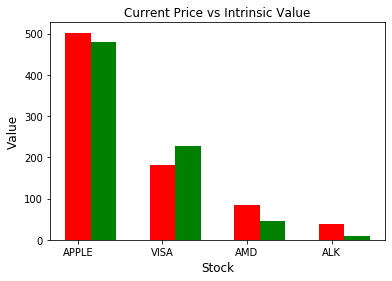

In [7]:
import numpy as np


#X = intrinsicvaluedf['Stock']
X = np.arange(4)
Y = (intrinsicvaluedf['Current Price'])
Z = (intrinsicvaluedf['Intrinsic Value']) 

ax1 = plotter.bar(intrinsicvaluedf['Stock'], Y, color = "r", width = .3)
ax2 = plotter.bar(X + 0.301, Z , color = "g", width = .3)

plotter.xlabel("Stock", fontsize = 12)
plotter.ylabel("Value", fontsize = 12)
plotter.title("Current Price vs Intrinsic Value")


#If the intrinsic value of a stock is greater than the market value of the stock, 
#an intrinsic value investor will look at it as an opportunity and buy the stock at its current market value in expectation of gain. The investor expects gain because it is believed that the market will keep correcting itself by incorporating more information as and when public. 
#Therefore the market price tends to move towards the intrinsic value.

#Current Price = Red
#Intrinsic Value = Green